**HW 10 - EC 414 - Prof. Kulis - Spring 2019**

Due Wednesday, May 1st, 2019.

## Problem 1: Universal approximation power of ReLU networks

A two layer NN with sigmoid activation function is a universal approximator, i.e: with sufficient hidden units, it can approximate any real function with desired accuracy. In this problem we want to demonstrate universal approximation power of NNs using ReLU activation units.

**Q1.1** Show that by composing only 2 hidden units in a ReLU network $-\sum_{i=1}^2a_i\ max(0,b_ix+c_i) -$ we can build an approximation to the step function $1[x>0]$.  Write some code to showcase this.


**Q1.2** Write some code to show that by composing 4 hidden units in a ReLU network, we can build an approximation to the unit impulse function of duration $\delta$

\begin{equation}
u_\delta(x) = 1[0\leq x\leq \delta]
\end{equation}

**Q1.3** Using your approximator for the unit impulse function in Q1.2, write code to draw the approximator for different duration values $\delta = [1,0.5,0.1]$.

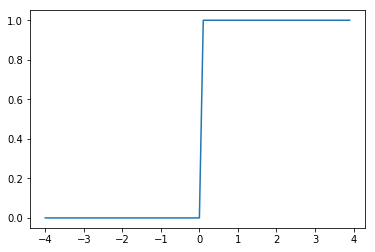

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# step function
domain = np.arange(-4.0, 4.0, 0.1)
r1 = np.maximum(0, domain)
r2 = np.maximum(0, domain - 0.1)
step_function_approx = 10*(r1 - r2)
plt.plot(domain, step_function_approx)

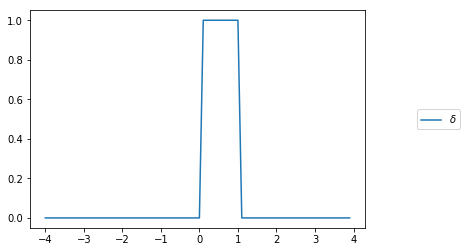

In [25]:
def plot_pluse_func_approx(delta, label = ""):
    im_r1 = np.maximum(0, domain)
    im_r2 = np.maximum(0, domain - 0.1)
    im_r3 = np.maximum(0, domain - delta)
    im_r4 = np.maximum(0, domain - (delta + 0.1))
    im = 10*(im_r1 - im_r2 - (im_r3 - im_r4))
    plt.plot(domain, im, label = label)
plot_pluse_func_approx(1)

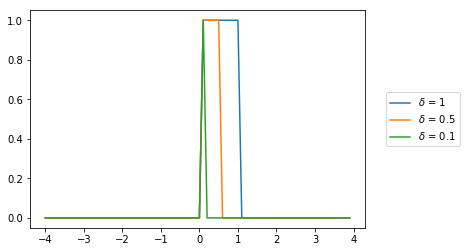

In [27]:
plot_pluse_func_approx(1, "$\delta$ = 1")
plot_pluse_func_approx(0.5, "$\delta$ = 0.5")
plot_pluse_func_approx(0.1, "$\delta$ = 0.1")
plt.legend(loc = 'right', bbox_to_anchor=(1.3, 0.5))

## Problem 2: Backprop in a simple MLP
Here, we ask you to derive all the steps of the backpropagation algorithm for a simple classification network. Consider a fully-connected neural network, also known as a multi-layer perceptron (MLP), with a single hidden layer and a one-node output layer. The hidden and output nodes use an elementwise sigmoid activation function and the loss layer uses cross-entropy loss:
<p>
$f(z)=\frac{1}{1+exp(-z))}$
<br>
$L(\hat{y},y)=-yln(\hat{y}) - (1-y)ln(1-\hat{y})$
</p>
<p>
The computation graph for an example network is shown below. Note that it has an equal number of nodes in the input and hidden layer (3 each), but, in general, they need not be equal. Also, to make the application of backprop easier, we show the <i>computation graph</i> which shows the dot product and activation functions as their own nodes, rather than the usual graph showing a single node for both.
</p>

<img src="mlpgraph.png" style="height:200px;">

The backpropagation algorithm for an MLP is displayed below. For simplicity, we will assume no regularization on the weights, so you can ignore the terms involving $\Omega$. The forward step is: 

<img src="forward.png" style="width:500px;">

and the backward step is:

<img src="backward.png" style="width:500px;">

Write down each step of the backward pass explicitly for all layers, i.e. for the loss and $k=2,1$, compute all gradients above, expressing them as a function of variables $x, y, h, W, b$. <i>Hint: you should substitute the updated values for the gradient $g$ in each step and simplify as much as possible.</i>  Specifically, compute the following (we have replaced the superscript notation $u^{(i)}$ with $u^i$):

**Q2.1**: $\nabla_{\hat{y}}L(\hat{y},y)$

**Q2.2**: $\nabla_{a^2}J$

**Q2.3**: $\nabla_{b^2}J$

**Q2.4**: $\nabla_{W^2}J$ <br><i>Hint: this should be a vector, since $W^2$ is a vector. </i>

**Q2.5**: $\nabla_{h^1}J$ 

**Q2.6**: $\nabla_{b^1}J$, $\nabla_{W^1}J$

**Q2.7** Briefly, explain how would the computational speed of backpropagation be affected if it did not include a forward pass?